In [38]:
# Dependencies and Setup
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [39]:
# More dependencies and Setup
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [40]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [41]:
pwd()

'c:\\Users\\larry\\OneDrive\\Desktop\\vbu_mod_10\\sqlalchemy-challenge\\SurfsUp_dude'

In [42]:
# creating engine to hawaii.sqlite
engine = create_engine("sqlite:////Users/larry/OneDrive/Desktop/vbu_mod_10/sqlalchemy-challenge/SurfsUp_dude/Resources/hawaii.sqlite", echo=False)

In [43]:
# reflecting an existing database into a new model
Base = automap_base()

# reflecting the tables
Base.prepare(autoload_with=engine)

In [44]:
# Viewing all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [45]:
# Saving references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [46]:
# Creating a session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [47]:
# Finding the most recent date in the data set.
the_latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
the_latest_date

('2017-08-23',)

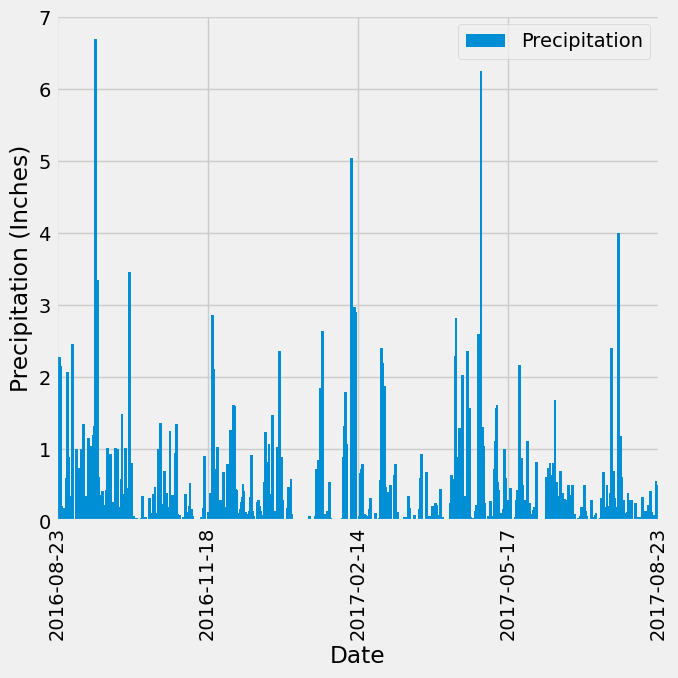

In [48]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculating the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# one_year_ago

# Performing a query to retrieve the data and precipitation scores
precipitation_scores = session.query(Measurement.date, Measurement.prcp) .\
    filter(Measurement.date >= '2016-08-23') .\
    filter(Measurement.date <= '2017-08-23').all()
#precipitation_scores

# Saving the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_scores_df = pd.DataFrame(precipitation_scores, columns=['Date', 'Precipitation'])

# Sorting the dataframe by date
precipitation_scores_df['Date'] = pd.to_datetime(precipitation_scores_df['Date'])  
precipitation_scores_df.sort_values(by='Date', inplace=True)
precipitation_scores_df.set_index('Date', inplace=True)
# precipitation_scores_df

# Using Pandas Plotting with Matplotlib to plot the data
ax = precipitation_scores_df.plot(kind='bar', width=10, figsize=(7, 7))
plt.xlabel('Date')
plt.ylabel('Precipitation (Inches)')

# Showing only 5 dates on the x-axis
num_ticks = 5
step = len(precipitation_scores_df) // (num_ticks - 1)
ticks = precipitation_scores_df.index[::step].strftime('%Y-%m-%d')
plt.xticks(range(0, len(precipitation_scores_df), step), ticks, rotation=90)
plt.tight_layout()
plt.show()

In [49]:
# Using Pandas to calculate the summary statistics for the precipitation data
summary_stats = precipitation_scores_df.describe()
summary_stats

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [50]:
# Designing a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).all()
total_stations

[(9,)]

In [53]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# Listing the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
    
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [54]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Creating a variable with the most active station ID
most_active_station_id = 'USC00519281'

# Query to calculate lowest, highest, and average temperature for the most active station
results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)) \
    .filter(Measurement.station == most_active_station_id).all()

results

[(54.0, 85.0, 71.66378066378067)]

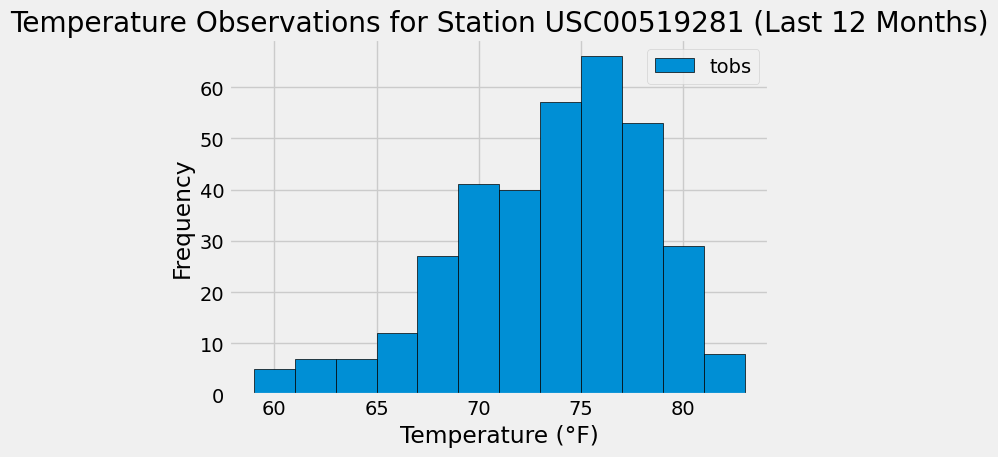

In [58]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station_id).\
    filter(Measurement.date >= one_year_ago).all()
    
#results

# Extracting temperature observations from the result
temperatures = [result[0] for result in results]

# Plotting the temperature observations as a histogram
plt.hist(temperatures, bins=12, edgecolor='black')
plt.title('Temperature Observations for Station USC00519281 (Last 12 Months)')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Close Session

In [59]:
# Close Session
session.close()